# Mini Project 3

## Fetch the data

In [200]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import spacy
import nltk
from nltk.stem.porter import *
from spacy.lang.en.stop_words import STOP_WORDS

import string

import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [201]:
# import the spam email csv
df = pd.read_csv('email_train.csv', encoding='unicode_escape')

In [202]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [203]:
# check if there are any null values
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [204]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    object
 2   Label         957 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [205]:
df['Message_body'] = df['Message_body'].astype('string')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    string
 2   Label         957 non-null    object
dtypes: int64(1), object(1), string(1)
memory usage: 22.6+ KB


In [207]:
# remove unnecessary columns
df.drop(columns=['S. No.'], inplace=True)

In [208]:
# change label column to 0s and 1s
df['Label'].replace({'Non-Spam': 0, 'Spam': 1}, inplace=True)

In [209]:
# check if there are any null values
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [210]:
df.head()

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1


## Clean the data

In [211]:
def clean_text(text):
    
    # remove full stops
    text = re.sub(r'\.', '', text)

    # remove punctuation
    text = re.sub(r'[!?*,()/:-;+=#&^@<>£\"\']', '', text)
    text = re.sub(r'ü', 'u', text)

    return text

In [212]:
df['Message_body'] = df['Message_body'].apply(clean_text)

In [213]:
df.sample(50)

,Message_body,Label
518,Yeah so basically any time next week you can g...,0
485,Aiya we discuss later lar Pick u up at 4 is it,0
941,Im on the bus Love you,0
904,Ladies first and genus second k,0
760,Call me when u finish then i come n pick u,0
877,Didnt try g and I decided not to head out,0
719,I am in escape theatre now Going to watch KAV...,0
315,I didnt get anything da,0
509,Geeeee Your internet is really bad today eh,0
709,Thanks and Or bomb and date as my phone want...,0


In [214]:
nlp = spacy.load('en_core_web_md')

In [215]:
doc = nlp(df['Message_body'][1])

In [216]:
doc

The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free

In [217]:
for token in doc:
    print(token.text)

The
guy
did
some
bitching
but
I
acted
like
i
d
be
interested
in
buying
something
else
next
week
and
he
gave
it
to
us
for
free


In [218]:
token_list = []

In [219]:
# change all text to lowercase
df['Message_body'] = df['Message_body'].apply(lambda s: s.lower())

In [220]:
df['Message_body']

0                              rofl its true to its name
1      the guy did some bitching but i acted like id ...
2      pity  was in mood for that soany other suggest...
3                    will u b going to esplanade fr home
4      this is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today r u workin hard...
953                        how much you got for cleaning
954    sorry da i gone mad so many pending works what...
955                                    wat time u finish
956                       just glad to be talking to you
Name: Message_body, Length: 957, dtype: object

In [221]:
for i, t in enumerate(doc): # t is token, i is index
    print('%2d| %r' % (i+1, t.text))
    token_list.append(t.text)
    if t.text == '.':
        break

 1| 'The'
 2| 'guy'
 3| 'did'
 4| 'some'
 5| 'bitching'
 6| 'but'
 7| 'I'
 8| 'acted'
 9| 'like'
10| 'i'
11| 'd'
12| 'be'
13| 'interested'
14| 'in'
15| 'buying'
16| 'something'
17| 'else'
18| 'next'
19| 'week'
20| 'and'
21| 'he'
22| 'gave'
23| 'it'
24| 'to'
25| 'us'
26| 'for'
27| 'free'


In [222]:
# attempt to stem
stemmer = PorterStemmer()

In [223]:
print(token_list)

['The', 'guy', 'did', 'some', 'bitching', 'but', 'I', 'acted', 'like', 'i', 'd', 'be', 'interested', 'in', 'buying', 'something', 'else', 'next', 'week', 'and', 'he', 'gave', 'it', 'to', 'us', 'for', 'free']


In [224]:
sent2 = token_list

In [225]:
for token in (token_list):
    print(stemmer.stem(token))

the
guy
did
some
bitch
but
i
act
like
i
d
be
interest
in
buy
someth
els
next
week
and
he
gave
it
to
us
for
free


In [226]:
def stem_words():

    for i, t in enumerate(doc): # t is token, i is index
        print('%2d| %r' % (i+1, t.text))
        token_list.append(t.text)
        if t.text == '.':
            break

    for token in (token_list):
        print(stemmer.stem(token))


In [227]:
stop_words = list(STOP_WORDS)

## Attempt at evaluating

In [228]:
# Features and Labels
X = df['Message_body']
y = df['Label']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [229]:
counts = CountVectorizer()

In [231]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [232]:
print(counts.get_feature_names())

['0121', '0207', '020903', '060505', '061104', '07808247860', '07808726822', '0784987', '0800', '08000839402', '08000930705', '08001950382', '08002986906', '08006344447', '083', '0844', '08448350055', '08452810073', '08701213186', '08701417012', '08701417012150p', '08702840625comuk', '08708034412', '0871', '08712300220', '08712405020', '08712460324', '0871277810710pmin', '08714712412', '08715203652', '08715203656', '08715203685', '08715205273', '08717507382', '08717509990', '08718720201', '08718726270', '08718726270150gbpmtmsg18', '087187272008', '08718738002', '08719180219', '08719899229', '09050000332', '09050090044', '09058094507', '09058094583', '09061213237', '09061221061', '09061221066', '09061743386', '09061790121', '09061790126', '09063458130', '09064015307', '09064019014', '09066361921', '09066364311', '09066380611', '09066649731from', '09077818151', '09094646631', '09095350301', '10', '100', '1000', '10000', '100000', '1030', '10am', '10p', '1172', '11mths', '12', '125', '128

In [244]:
df_bow = pd.DataFrame(A.toarray(), columns=counts.get_feature_names())

c:\Users\sjayb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [245]:
df_bow

,0121,0207,020903,060505,061104,07808247860,07808726822,0784987,0800,08000839402,...,yours,yourself,youve,yoville,yr,yuo,yup,zebra,zed,zeros
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [234]:
# train the classifier with the training data
classifier.fit(A, y_train)

SVC(kernel='linear', probability=True)

In [235]:
classifier.score(A, y_train)

1.0

In [236]:
B = counts.transform(X_test)

In [237]:
classifier.score(B, y_test)

0.9427083333333334

In [238]:
predictions = classifier.predict(B)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

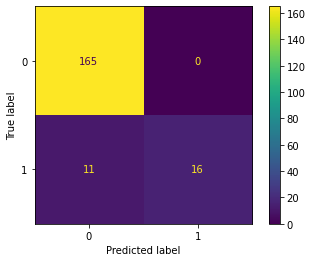

In [239]:
c_matrix = metrics.confusion_matrix(y_test, predictions)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()